In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Defining constants and creating the Position generating function as well as the action for a harmonic potential

In [2]:
#Creating the position generating function

def Pos_Gen(x_0, x_N, Steps): #Generates random array of positions

    pos_list = [x_0]

    for i in range(Steps-2):
        r = np.random.uniform(x_0, x_N)
        pos_list.append(r)

    pos_list.append(x_N)
    return np.array(pos_list)

In [3]:
#Define Constants, initialize arrays
seed = 42

#position start and end point
x_0 = 0
x_N = 2

#time start and end point
t_i = 0
t_f = 4

#other constants
mass = 1
steps = 7
numb_paths = 10

times = np.linspace(t_i, t_f, steps) #array of time steps, the times are float values

positions = Pos_Gen(x_0, x_N, steps)

print(f"Times: {times}, which is a {type(times)} variable;\nPositions: {positions}, which is a {type(positions)} variable")

Times: [0.         0.66666667 1.33333333 2.         2.66666667 3.33333333
 4.        ], which is a <class 'numpy.ndarray'> variable;
Positions: [0.         0.32191172 0.04320824 1.41136712 0.67686014 0.50434583
 2.        ], which is a <class 'numpy.ndarray'> variable


In [4]:
positions = Pos_Gen(x_0, x_N, steps)


def action_harmonic(positions, times, mass):

    #This function calculates the action integral for a path (positions)

    #Input Validation
    if type(positions) != np.ndarray:
        raise TypeError("WARNING: position input is not a numpy array")
    if type(times) != np.ndarray:
        raise TypeError("WARNING: time input is not a numpy array")

    #Calculating the action using discrete steps and straight line approx
    S = 0
    for i in range(len(times)-1):
        dt = times[i+1] - times[i]
        dx = positions[i+1] - positions[i]
        T = 0.5 * mass * (dx/dt)**2
        V = 0.5 * (((positions[i]+positions[i+1])/2)**2)
        S += dt*(T + V)

    return S

action_harmonic(positions, times, mass)

np.float64(6.70608412641973)

# Generating the array of paths and weighting them in accordance with their action

In [5]:
#generate an array of paths
paths = []
for i in range(numb_paths):
    p = Pos_Gen(x_0, x_N, steps)
    paths.append(p)

paths = np.array(paths)


#calcualte the exponential of the action of each path
exponential = []
for i in range(len(paths)):
    dt = times[1] - times[0]
    w = np.exp(-action_harmonic(paths[i], times, mass))
    exponential.append(w)
print(exponential)

# #need to integrate the exponential across all paths:
# path_integral = []
# for i in range(len(paths)):
#     val = 0
#     dx = paths[:,i+1] - paths[:,i]
#     int = 5




#structure of paths:
#paths = [(array 1),(array 2),...,(array n)]
#weights = [(weight of path 1),(weight of path 2),...,(weight of path n)]
# total_weight = np.sum(weights)
# stacked = np.vstack(paths)
#
# empty = []
# for i in range(len(weights)):
#     val = stacked[i,:]*weights[i]
#     empty.append(val)
#
# weighted_paths = np.vstack(empty)
#
# mean_path = np.sum(weighted_paths, axis=0)/total_weight

[np.float64(0.0025353237934988373), np.float64(0.0005659997036684349), np.float64(0.0005475320519503651), np.float64(0.005897291887460144), np.float64(0.00020871164383306535), np.float64(0.0025300491239983202), np.float64(0.0007559366748454631), np.float64(0.006281647834855963), np.float64(0.0055089065324159265), np.float64(0.0005001391058692793)]


# Plotting the monte carlo path vs the theoretical path

In [6]:
#creating the theoretical path
#theoretical =[0, 0.0263, 0.0647, 0.1329, 0.2600,0.5139,1.0000]

def schrodinger_ground_state(paths):
    phi = (np.exp((-paths)/2))/(np.pi**0.25)
    return phi**2

theoretical_wavefunction = schrodinger_ground_state(np.linspace(x_0, x_N, steps))
print(theoretical_wavefunction)

[0.56418958 0.4042595  0.28966459 0.20755375 0.14871876 0.10656165
 0.07635476]


In [7]:
#Plotting the weighted path

plt.figure(1)

plt.plot(times, mean_path, label = 'calculated', color = 'blue')
plt.xlabel('Time (s)')
plt.ylabel('Mean x position')
plt.legend()
plt.show()

NameError: name 'mean_path' is not defined

<Figure size 640x480 with 0 Axes>

# Plotting monte carlo wavefunction vs ground state wave function

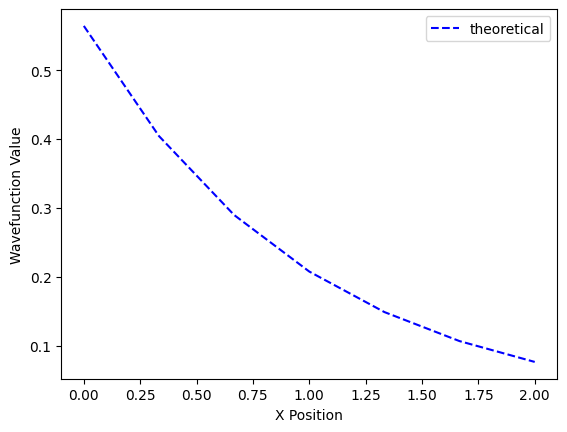

In [8]:
plt.figure(1)
plt.plot(np.linspace(x_0,x_N,steps), theoretical_wavefunction, label = 'theoretical', color = 'blue', linestyle = '--')

plt.legend()
plt.xlabel('X Position')
plt.ylabel('Wavefunction Value')
plt.show()

# Plot for poster

In [9]:
label = ['path 1','path 2','path 3','path 4','path 5']
colors = ['blue', 'red', 'green', 'orange', 'purple']

plt.figure(1)

plt.plot(mean_path,times,  label = 'Mean Path', color = 'black')

for i in range(len(label)):
    plt.plot(paths[9*i+10],times, label = label[i], color = colors[i], alpha = 0.4, linestyle = '--')

#plt.legend()
plt.ylabel('Time (s)')
plt.xlabel('x Position')
plt.savefig(r"C:\Users\Sebastian\Documents\University work\Year 3\Computational Physics\mean_path_integral.svg", bbox_inches='tight', format = 'svg')
plt.show()

NameError: name 'mean_path' is not defined

<Figure size 640x480 with 0 Axes>